<a href="https://colab.research.google.com/github/Aboubacar2012/Data_Analysis_Project/blob/main/Uber_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

#####Load & Collect your entire data..

In [3]:
# import os 
import os 

In [4]:
os.listdir(r'/content/drive/MyDrive/ml_data/Data_Analysis/Project_1 Uber New York Data analysis /uber-pickups-in-new-york-city')

['Uber-Jan-Feb-FOIL.csv',
 'other-Carmel_B00256.csv',
 'other-Dial7_B00887.csv',
 'other-American_B01362.csv',
 'other-Diplo_B01196.csv',
 'other-Highclass_B01717.csv',
 'other-Lyft_B02510.csv',
 'other-Firstclass_B01536.csv',
 'other-Federal_02216.csv',
 'other-FHV-services_jan-aug-2015.csv',
 'other-Skyline_B00111.csv',
 'other-Prestige_B01338.csv',
 'uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [5]:
# Let's say we want have the last 7 seven dataset 
os.listdir(r'/content/drive/MyDrive/ml_data/Data_Analysis/Project_1 Uber New York Data analysis /uber-pickups-in-new-york-city')[-7:]

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [6]:
files=os.listdir(r'/content/drive/MyDrive/ml_data/Data_Analysis/Project_1 Uber New York Data analysis /uber-pickups-in-new-york-city')[-7:]

In [7]:
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [8]:
# Let's remove uber-raw-data-janjuney15.csv
files.remove('uber-raw-data-janjune-15.csv')

In [9]:
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [11]:
# Let's read, define concat our dataset
path=r'/content/drive/MyDrive/ml_data/Data_Analysis/Project_1 Uber New York Data analysis /uber-pickups-in-new-york-city' 
final=pd.DataFrame()
for file in files:
  df=pd.read_csv(path+"/"+file, encoding='utf-8')
  final=pd.concat([df, final])

In [12]:
final.shape

(4534327, 4)

In [13]:
final.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


##### Prepare our data for analysis

In [14]:
df=final.copy()

In [15]:
df.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [16]:
df.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [18]:
df['Date/Time']=pd.to_datetime(df['Date/Time'], format='%m/%d/%Y %H:%M:%S')

In [19]:
df.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
dtype: object

In [20]:
df.head()

,Date/Time,Lat,Lon,Base
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512


In [ ]:
# Let's extract weekday, day, minute, month, hour

In [22]:
df['weekday']=df['Date/Time'].dt.day_name()

In [23]:
df['day']=df['Date/Time'].dt.day

In [24]:
df['minute']=df['Date/Time'].dt.minute
df['month']=df['Date/Time'].dt.month
df['hour']=df['Date/Time'].dt.hour

In [25]:
df.head()

,Date/Time,Lat,Lon,Base,weekday,day,minute,month,hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,Monday,1,1,9,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,Monday,1,1,9,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,Monday,1,3,9,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,Monday,1,6,9,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,Monday,1,11,9,0


In [26]:
df.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
weekday              object
day                   int64
minute                int64
month                 int64
hour                  int64
dtype: object

In [27]:
df['weekday'].value_counts()

Thursday     755145
Friday       741139
Wednesday    696488
Tuesday      663789
Saturday     646114
Monday       541472
Sunday       490180
Name: weekday, dtype: int64

In [32]:
df['weekday'].value_counts().index

Index(['Thursday', 'Friday', 'Wednesday', 'Tuesday', 'Saturday', 'Monday',
       'Sunday'],
      dtype='object')

In [30]:
# let's plot this weekday

In [31]:
import plotly.express as px 

In [33]:
px.bar(x=df['weekday'].value_counts().index,
       y=df['weekday'].value_counts())

In [34]:
### Analysis by hour 

(array([216928., 103517., 227152., 543565., 324851., 366329., 819491.,
        660869., 579117., 692508.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <a list of 10 Patch objects>)

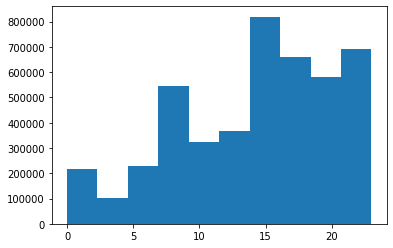

In [35]:
plt.hist(df['hour'])

In [36]:
# Analysis by month (each every month)
df['month'].unique()

array([9, 5, 6, 7, 8, 4])

In [37]:
for i, month in enumerate(df['month'].unique()):
  print(i)
  print(month)

0
9
1
5
2
6
3
7
4
8
5
4


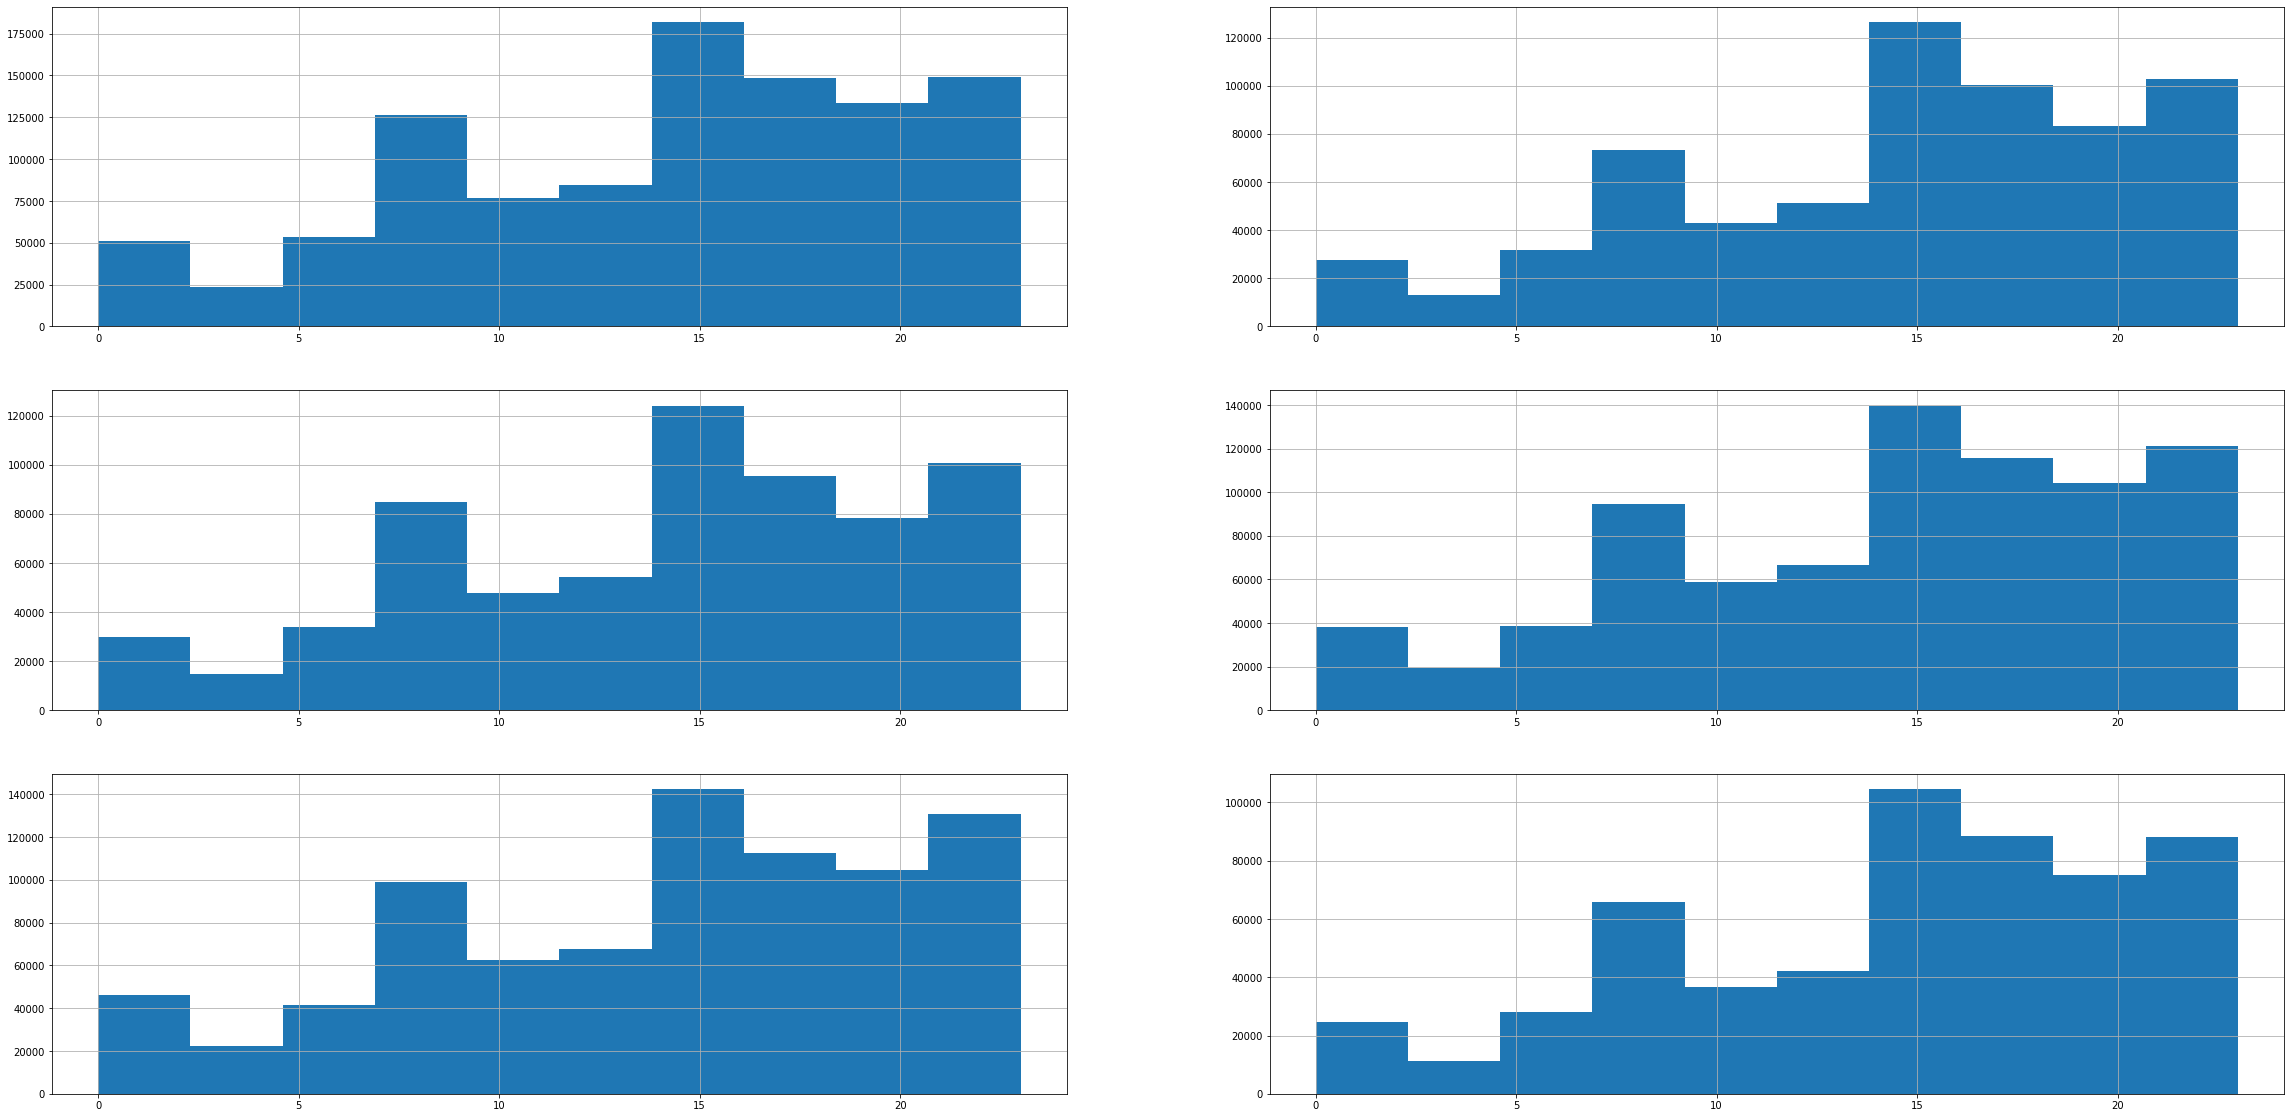

In [41]:
import warnings 
warnings.filterwarnings('ignore')
plt.figure(figsize=(40,20))
for i, month in enumerate(df['month'].unique()):
  plt.subplot(3,2, i+1)
  df[df['month']==month]['hour'].hist()

##### Q1 : Analysis of which month has max rides
##### Q2 : Analysis of Journey of Each days

In [42]:
df.head()

,Date/Time,Lat,Lon,Base,weekday,day,minute,month,hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,Monday,1,1,9,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,Monday,1,1,9,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,Monday,1,3,9,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,Monday,1,6,9,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,Monday,1,11,9,0


In [44]:
# Months (we have to group by month)
import plotly.graph_objects as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 

In [46]:
!pip install chart_studio

     |████████████████████████████████| 71kB 5.1MB/s 


In [47]:
import chart_studio.plotly as py

In [48]:
df.groupby('month')['hour'].count()

month
4     564516
5     652435
6     663844
7     796121
8     829275
9    1028136
Name: hour, dtype: int64

In [65]:
# Method 1 : 
fig=go.Bar(
       x=df.groupby('month')['hour'].count().index,
      y=df.groupby('month')['hour'].count(),
          name='Priority'
)
iplot([fig])

In [66]:
# Method 2 : 
px.bar(
     x=df.groupby('month')['hour'].count().index,
     y=df.groupby('month')['hour'].count(),
  
)

In [ ]:
## Day Distribution 

Text(0.5, 1.0, 'Journey by month day')

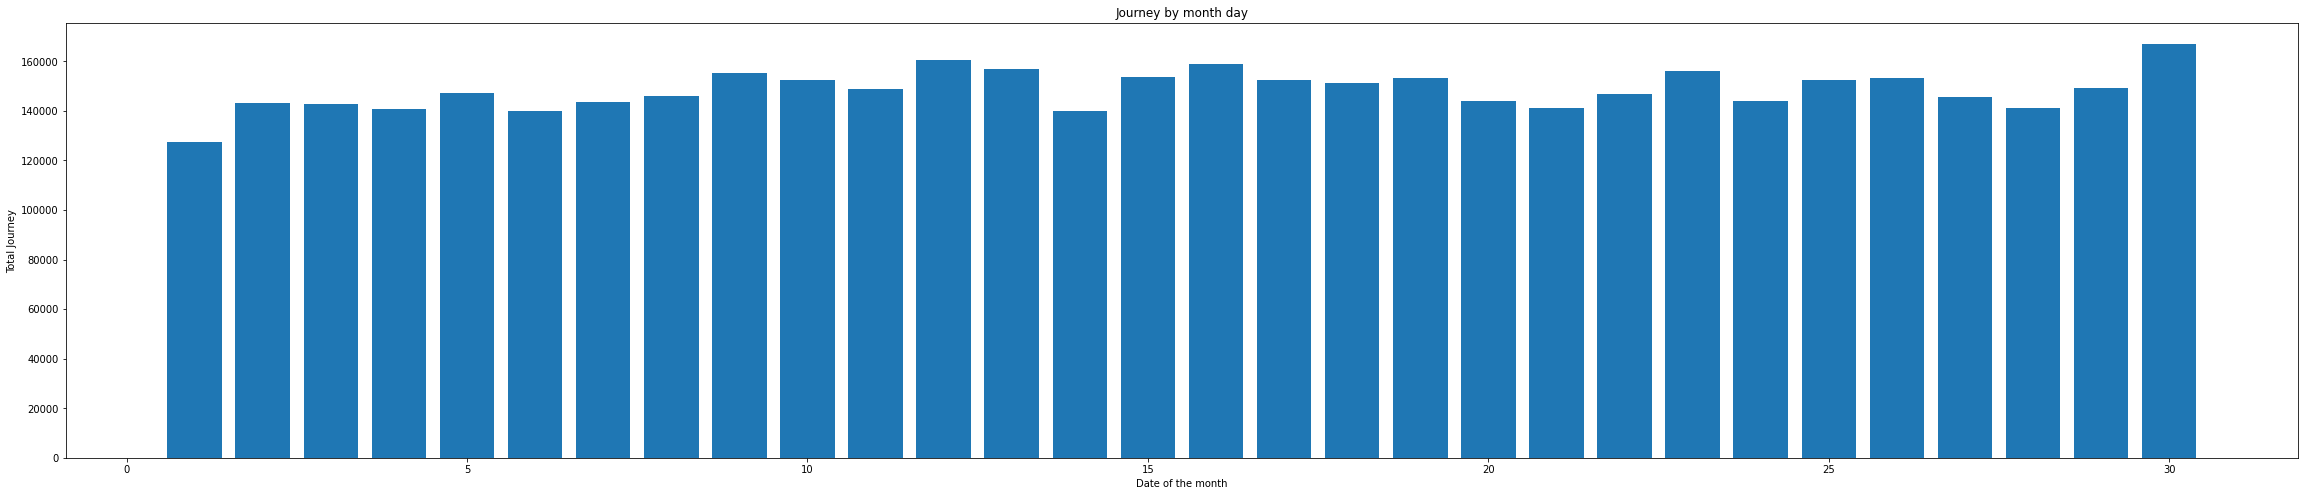

In [79]:
# Method 1 :
plt.figure(figsize=(40,8))
plt.hist(df['day'], bins=30, rwidth=0.8, range=(0.5, 30.5))
plt.xlabel('Date of the month')
plt.ylabel('Total Journey')
plt.title('Journey by month day')

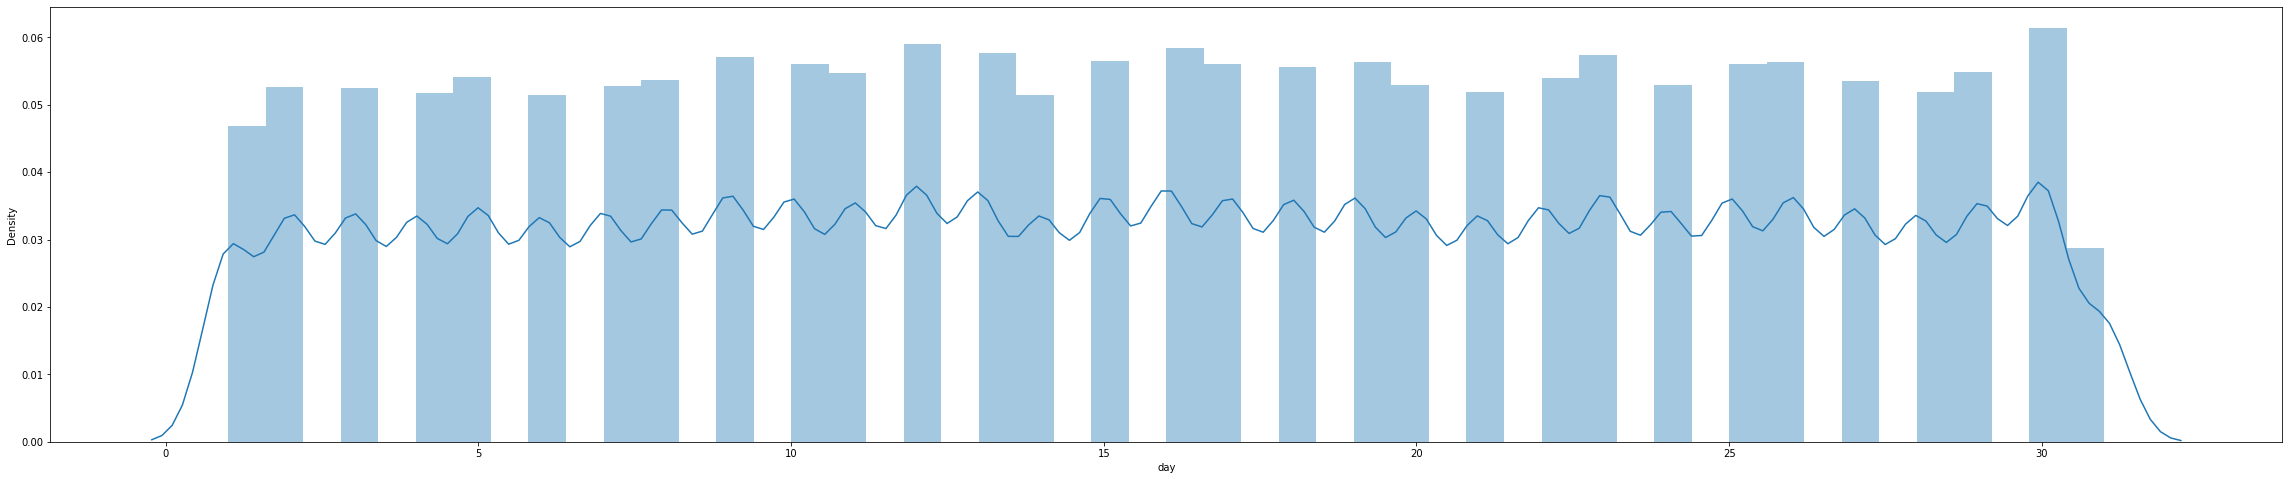

In [78]:
# Method 2 : 
plt.figure(figsize=(40,8))
sns.distplot(df['day'])

##### Analyzing demand of Ubers

##### Q1 : Analysis of Total rides month wise
##### Q2 : Analysing Rush in hour

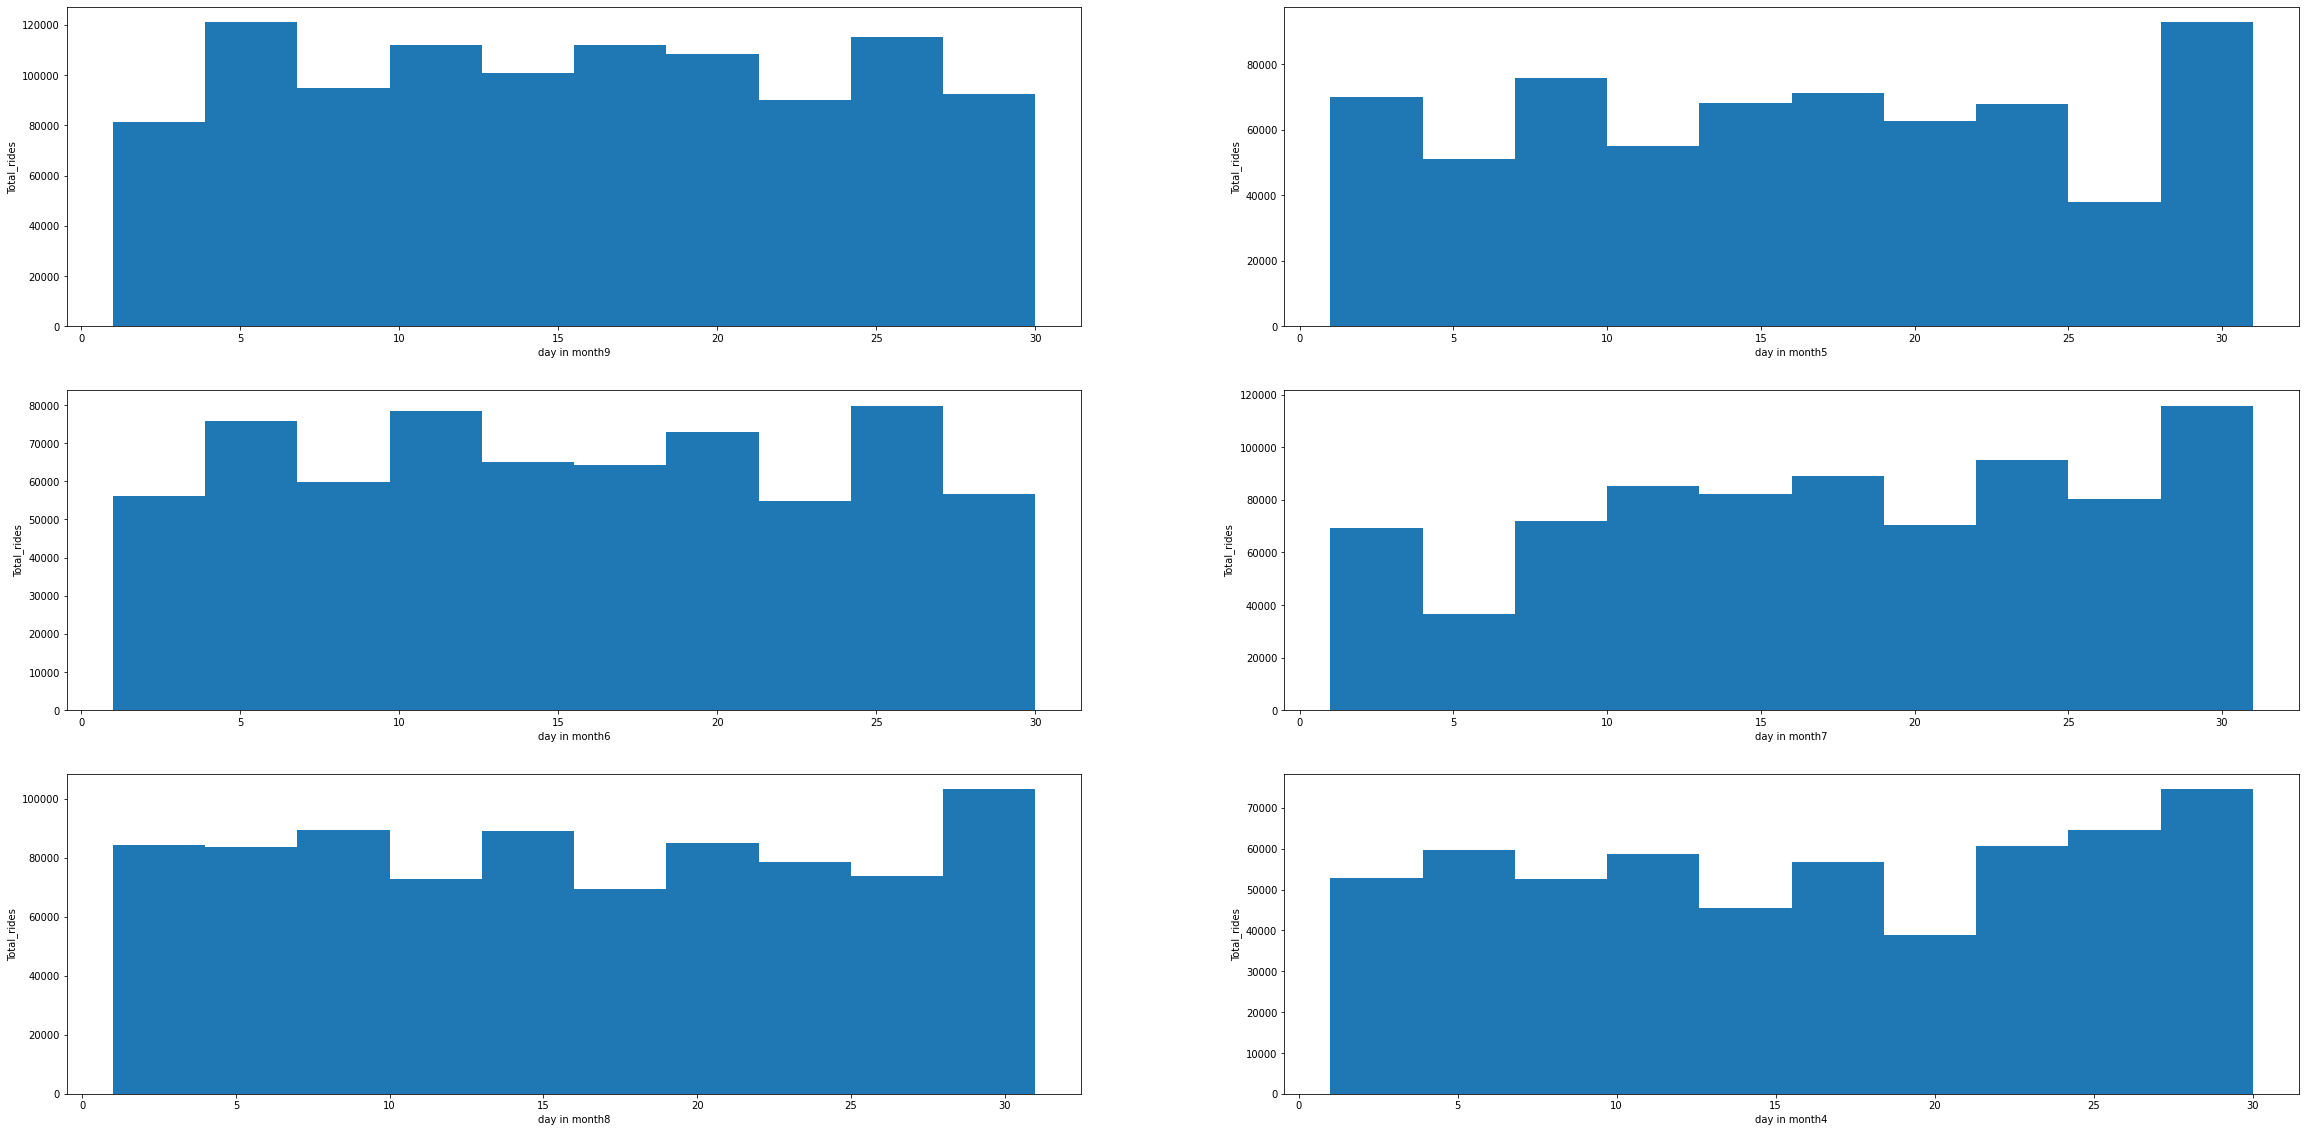

In [87]:
# Q1 : Analysis of Total rides month wise
plt.figure(figsize=(40,20))
for i, month in enumerate(df['month'].unique(),1):
  plt.subplot(3,2,i)
  df_out=df[df['month']==month]
  plt.hist(df_out['day'])
  plt.xlabel('day in month{}'.format(month))
  plt.ylabel('Total_rides')

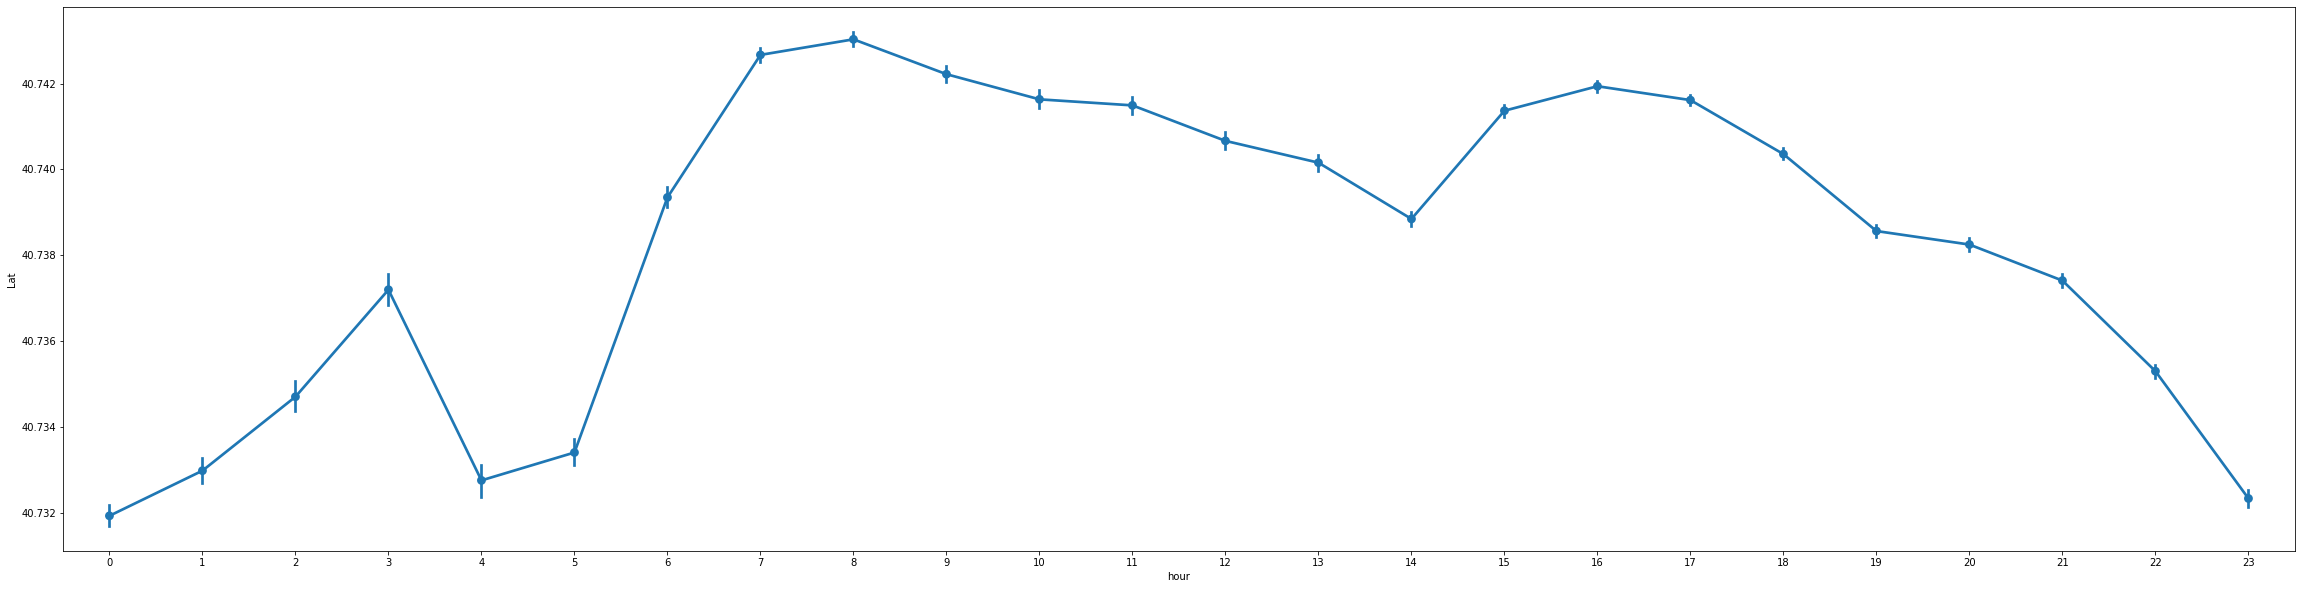

In [91]:
#Q2 : Analysing Rush in hour
plt.figure(figsize=(40,10))
sns.pointplot(x='hour', y='Lat', data=df)

Text(0.5, 1.0, 'Hours off day vas Latitude of passenger')

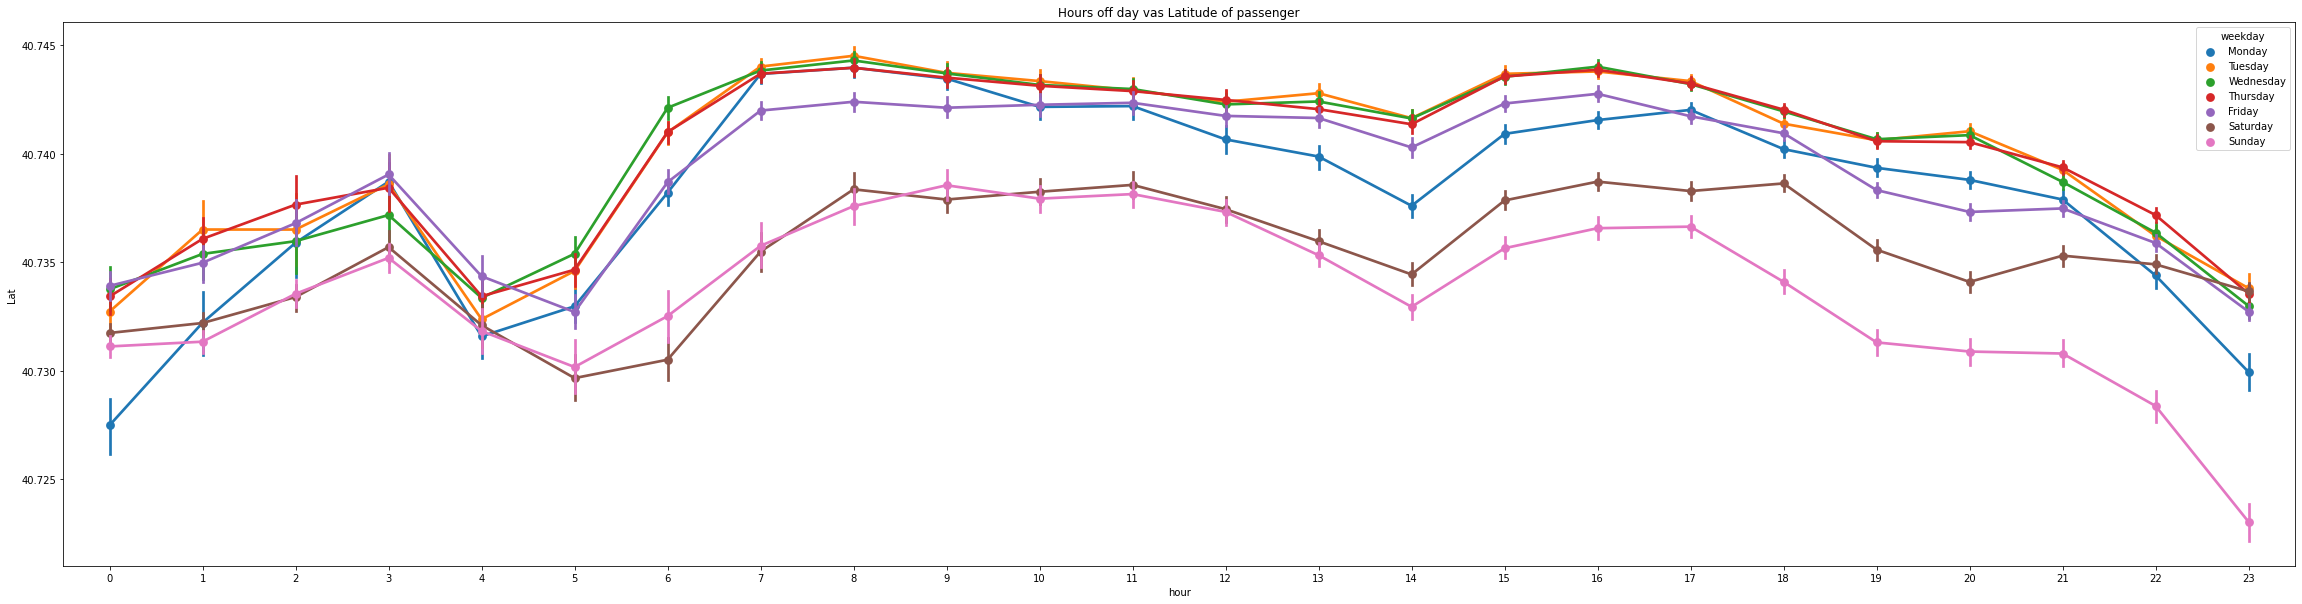

In [92]:
#Q2 : Analysing Rush in hour
# Add hue='weekday', and title
plt.figure(figsize=(40,10))
ax=sns.pointplot(x='hour', y='Lat', data=df,hue='weekday')
ax.set_title('Hours off day vas Latitude of passenger')

##### Q1 : Analyse which base number gets popular by month name?
##### Q2 : Perform Cross Analysis
##### Through our exploration we are going to visualize:
##### 1. Heatmap by Hour and Weekday
##### 2. Heatmap by Hour and Day.
##### 3. Heatmap by Month and Day.
##### 4. Heatmap by Month and Weekday.

In [93]:
df.head()

,Date/Time,Lat,Lon,Base,weekday,day,minute,month,hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,Monday,1,1,9,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,Monday,1,1,9,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,Monday,1,3,9,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,Monday,1,6,9,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,Monday,1,11,9,0


In [94]:
# Group the dataset of basis of Base and Month
df.groupby(['Base','month'])['Date/Time'].count()

Base    month
B02512  4         35536
        5         36765
        6         32509
        7         35021
        8         31472
        9         34370
B02598  4        183263
        5        260549
        6        242975
        7        245597
        8        220129
        9        240600
B02617  4        108001
        5        122734
        6        184460
        7        310160
        8        355803
        9        377695
B02682  4        227808
        5        222883
        6        194926
        7        196754
        8        173280
        9        197138
B02764  4          9908
        5          9504
        6          8974
        7          8589
        8         48591
        9        178333
Name: Date/Time, dtype: int64

In [95]:
# Let's convert into dataframe
base=df.groupby(['Base','month'])['Date/Time'].count().reset_index()
base

,Base,month,Date/Time
0,B02512,4,35536
1,B02512,5,36765
2,B02512,6,32509
3,B02512,7,35021
4,B02512,8,31472
5,B02512,9,34370
6,B02598,4,183263
7,B02598,5,260549
8,B02598,6,242975
9,B02598,7,245597


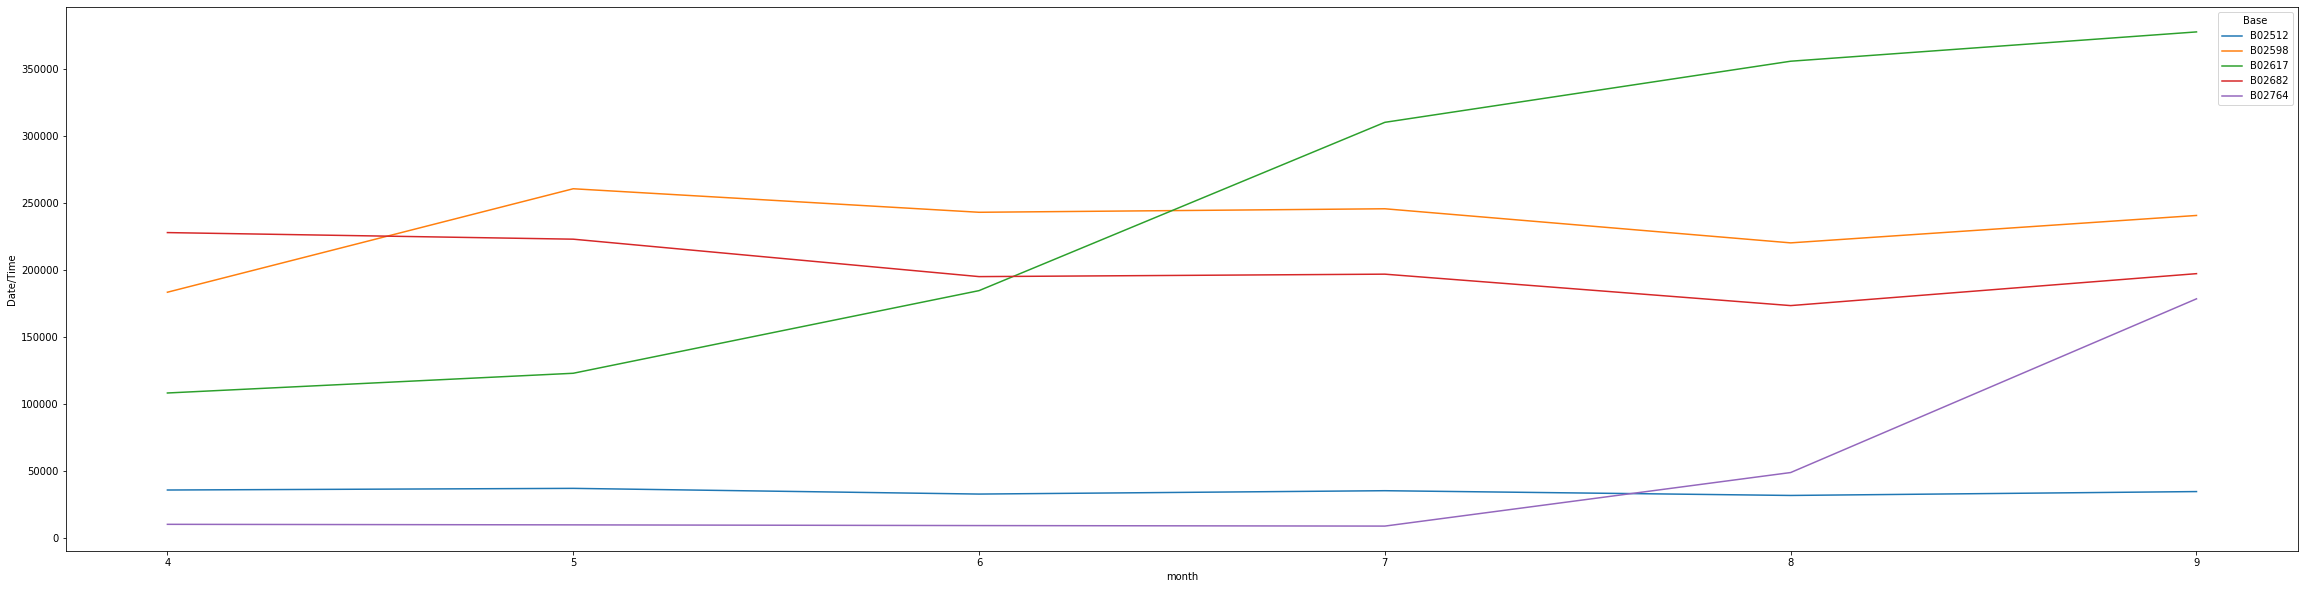

In [97]:
# Let's visualize it 
plt.figure(figsize=(40,10))
sns.lineplot(x='month', y='Date/Time', hue='Base', data=base)

In [98]:
# Perform Cross Analysis
# 1. Heatmap between Hour and Weekday

In [99]:
#Let's define a function that will count rows 
def count_rows(rows):
  return len(rows)

In [100]:
df.groupby(['weekday','hour']).apply(count_rows)

weekday    hour
Friday     0       13716
           1        8163
           2        5350
           3        6930
           4        8806
                   ...  
Wednesday  19      47017
           20      47772
           21      44553
           22      32868
           23      18146
Length: 168, dtype: int64

In [101]:
by_cross=df.groupby(['weekday','hour']).apply(count_rows)
by_cross

weekday    hour
Friday     0       13716
           1        8163
           2        5350
           3        6930
           4        8806
                   ...  
Wednesday  19      47017
           20      47772
           21      44553
           22      32868
           23      18146
Length: 168, dtype: int64

In [102]:
# Let's convert into pivotable
by_cross.unstack()

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,,,,
Friday,13716,8163,5350,6930,8806,13450,23412,32061,31509,25230,24176,25188,25907,30341,36206,43673,48169,51961,54762,49595,43542,48323,49409,41260
Monday,6436,3737,2938,6232,9640,15032,23746,31159,29265,22197,20288,20333,20488,23385,28157,32744,38770,42023,37000,34159,32849,28925,20158,11811
Saturday,27633,19189,12710,9542,6846,7084,8579,11014,14411,17669,20596,22718,24298,26636,31418,38769,43512,42844,45883,41098,38714,43826,47951,43174
Sunday,32877,23015,15436,10597,6374,6169,6596,8728,12128,16401,19839,22856,23911,26417,28151,31112,33038,31521,28291,25948,25076,23967,19566,12166
Thursday,9293,5290,3719,5637,8505,14169,27065,37038,35431,27812,25877,25966,26465,30840,36699,44442,50560,56704,55825,51907,51990,51953,44194,27764
Tuesday,6237,3509,2571,4494,7548,14241,26872,36599,33934,25023,23676,23679,23850,29075,34846,41338,48667,55500,50186,44789,44661,39913,27712,14869
Wednesday,7644,4324,3141,4855,7511,13794,26943,36495,33826,25635,24696,24963,25533,29183,35148,43388,50684,55637,52732,47017,47772,44553,32868,18146


In [103]:
pivot=by_cross.unstack()
pivot

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,,,,
Friday,13716,8163,5350,6930,8806,13450,23412,32061,31509,25230,24176,25188,25907,30341,36206,43673,48169,51961,54762,49595,43542,48323,49409,41260
Monday,6436,3737,2938,6232,9640,15032,23746,31159,29265,22197,20288,20333,20488,23385,28157,32744,38770,42023,37000,34159,32849,28925,20158,11811
Saturday,27633,19189,12710,9542,6846,7084,8579,11014,14411,17669,20596,22718,24298,26636,31418,38769,43512,42844,45883,41098,38714,43826,47951,43174
Sunday,32877,23015,15436,10597,6374,6169,6596,8728,12128,16401,19839,22856,23911,26417,28151,31112,33038,31521,28291,25948,25076,23967,19566,12166
Thursday,9293,5290,3719,5637,8505,14169,27065,37038,35431,27812,25877,25966,26465,30840,36699,44442,50560,56704,55825,51907,51990,51953,44194,27764
Tuesday,6237,3509,2571,4494,7548,14241,26872,36599,33934,25023,23676,23679,23850,29075,34846,41338,48667,55500,50186,44789,44661,39913,27712,14869
Wednesday,7644,4324,3141,4855,7511,13794,26943,36495,33826,25635,24696,24963,25533,29183,35148,43388,50684,55637,52732,47017,47772,44553,32868,18146


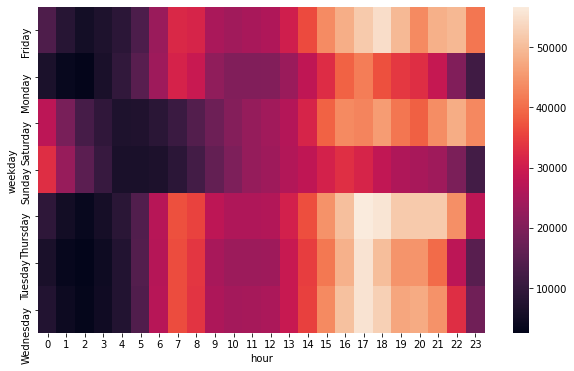

In [105]:
# Let's build heatmap 
plt.figure(figsize=(10,6))
sns.heatmap(pivot)

In [106]:
# Task
#2. Heatmap by Hour and Day.
#3. Heatmap by Month and Day.
#4. Heatmap by Month and Weekday.

In [108]:
# For this task let's define function 
def heatmap(col1, col2):
  by_cross=df.groupby([col1,col2]).apply(count_rows)
  pivot=by_cross.unstack()
  plt.figure(figsize=(10,6))
  return sns.heatmap(pivot)

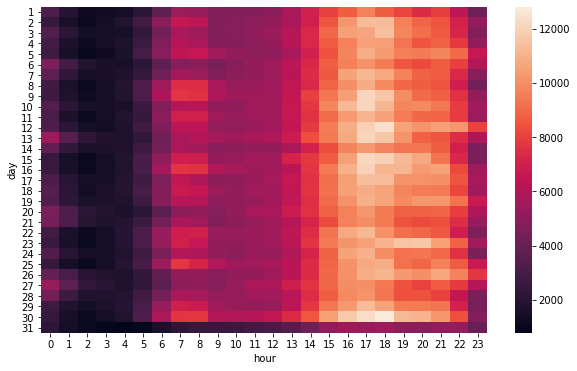

In [109]:
#2. Heatmap by Hour and Day
heatmap('day','hour')

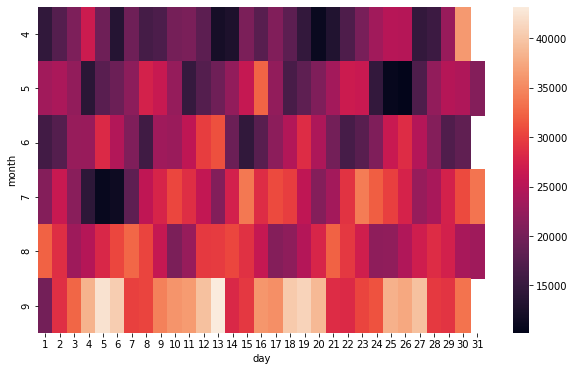

In [110]:
#3. Heatmap by Month and Day.
heatmap('month','day')

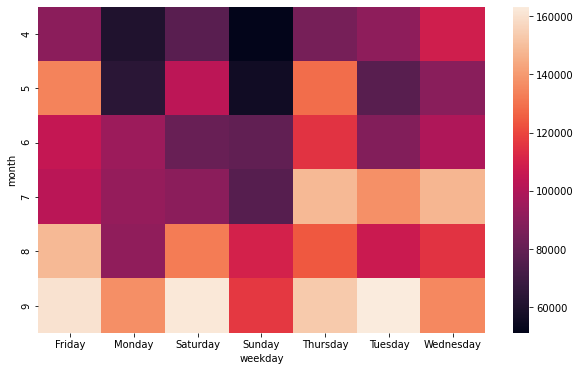

In [111]:
#4. Heatmap by Month and Weekday.
heatmap('month','weekday')

##### Perform Spatial Analysis on Demand of Ubers

In [112]:
df.head()

,Date/Time,Lat,Lon,Base,weekday,day,minute,month,hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,Monday,1,1,9,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,Monday,1,1,9,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,Monday,1,3,9,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,Monday,1,6,9,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,Monday,1,11,9,0


(40.6, 41.0)

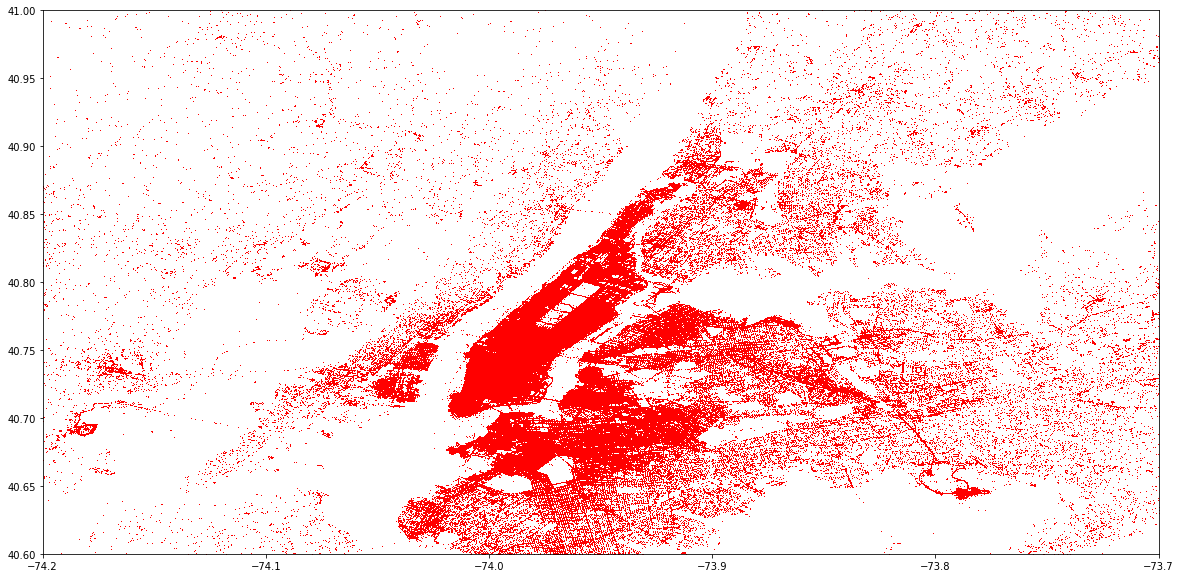

In [117]:
plt.figure(figsize=(20,10))
plt.plot(df['Lon'], df['Lat'],'r+', ms=0.5)
plt.xlim(-74.2, -73.7)
plt.ylim(40.6,41)

In [118]:
### Q1 : Analysis of Location data points
### Q2 : Perform Spatial Analysis using heatmap to get a clear cut of Rush
### Q3 : Automate your Analysis.

In [119]:
df_sunday=df[df['weekday']=='Sunday']

In [122]:
df_sunday.shape

(490180, 9)

In [121]:
df_sunday.head()

,Date/Time,Lat,Lon,Base,weekday,day,minute,month,hour
8011,2014-09-07 00:00:00,40.7341,-74.0005,B02512,Sunday,7,0,9,0
8012,2014-09-07 00:00:00,40.7344,-73.9900,B02512,Sunday,7,0,9,0
8013,2014-09-07 00:00:00,40.7806,-73.9582,B02512,Sunday,7,0,9,0
8014,2014-09-07 00:01:00,40.7293,-73.9859,B02512,Sunday,7,1,9,0
8015,2014-09-07 00:01:00,40.7713,-74.0133,B02512,Sunday,7,1,9,0


In [123]:
# Group the data on basis no Lat and Lon
df_sunday.groupby(['Lat','Lon'])['weekday'].count()

Lat      Lon     
39.9374  -74.0722    1
39.9378  -74.0721    1
39.9384  -74.0742    1
39.9385  -74.0734    1
39.9415  -74.0736    1
                    ..
41.3141  -74.1249    1
41.3180  -74.1298    1
41.3195  -73.6905    1
41.3197  -73.6903    1
42.1166  -72.0666    1
Name: weekday, Length: 209230, dtype: int64

In [125]:
# Let's convert it into dataframe 
df_sunday.groupby(['Lat','Lon'])['weekday'].count().reset_index()

,Lat,Lon,weekday
0,39.9374,-74.0722,1
1,39.9378,-74.0721,1
2,39.9384,-74.0742,1
3,39.9385,-74.0734,1
4,39.9415,-74.0736,1
...,...,...,...
209225,41.3141,-74.1249,1
209226,41.3180,-74.1298,1
209227,41.3195,-73.6905,1
209228,41.3197,-73.6903,1


In [126]:
rush=df_sunday.groupby(['Lat','Lon'])['weekday'].count().reset_index()
rush

,Lat,Lon,weekday
0,39.9374,-74.0722,1
1,39.9378,-74.0721,1
2,39.9384,-74.0742,1
3,39.9385,-74.0734,1
4,39.9415,-74.0736,1
...,...,...,...
209225,41.3141,-74.1249,1
209226,41.3180,-74.1298,1
209227,41.3195,-73.6905,1
209228,41.3197,-73.6903,1


In [127]:
rush.columns=['Lat','Lon','No of Trips']

In [128]:
rush

,Lat,Lon,No of Trips
0,39.9374,-74.0722,1
1,39.9378,-74.0721,1
2,39.9384,-74.0742,1
3,39.9385,-74.0734,1
4,39.9415,-74.0736,1
...,...,...,...
209225,41.3141,-74.1249,1
209226,41.3180,-74.1298,1
209227,41.3195,-73.6905,1
209228,41.3197,-73.6903,1


In [130]:
!pip install folium

In [133]:
from folium.plugins import HeatMap

In [136]:
import folium


In [149]:
basemap=folium.Map()

In [157]:
# Review this block of code
#HeatMap(list(zip(rush))).add_to(basemap)
#basemap

In [158]:
## Automate 
def plot(df, day):
  basemap=folium.Map()
  df_sunday=df[df['weekday']==day]
  HeatMap(df_sunday.groupby(['Lat','Lon'])['weekday'].count().reset_index(), max_zoom=18, radius=25).add_to(basemap)
  return basemap

In [159]:
# Rewiew this block of code 
#sys.setrecursionlimit(1500)
#plot(df, 'Saturday')

##### Analysing Uber Pickup in Each Month

In [160]:
uber_15=pd.read_csv(r'/content/drive/MyDrive/ml_data/Data_Analysis/Project_1 Uber New York Data analysis /uber-pickups-in-new-york-city/uber-raw-data-janjune-15.csv')

In [161]:
uber_15.shape

(14270479, 4)

In [162]:
uber_15.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90


In [163]:
uber_15.dtypes

Dispatching_base_num    object
Pickup_date             object
Affiliated_base_num     object
locationID               int64
dtype: object

In [165]:
uber_15['Pickup_date']=pd.to_datetime(uber_15['Pickup_date'], format='%Y-%m-%d %H:%M:%S')

In [166]:
uber_15.dtypes

Dispatching_base_num            object
Pickup_date             datetime64[ns]
Affiliated_base_num             object
locationID                       int64
dtype: object

In [167]:
# Let's extract weekday, day, minute, month, hour
uber_15['weekday']=uber_15['Pickup_date'].dt.day_name()
uber_15['day']=uber_15['Pickup_date'].dt.day
uber_15['minute']=uber_15['Pickup_date'].dt.minute
uber_15['month']=uber_15['Pickup_date'].dt.month
uber_15['hour']=uber_15['Pickup_date'].dt.hour

In [168]:
uber_15.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,weekday,day,minute,month,hour
0,B02617,2015-05-17 09:47:00,B02617,141,Sunday,17,47,5,9
1,B02617,2015-05-17 09:47:00,B02617,65,Sunday,17,47,5,9
2,B02617,2015-05-17 09:47:00,B02617,100,Sunday,17,47,5,9
3,B02617,2015-05-17 09:47:00,B02774,80,Sunday,17,47,5,9
4,B02617,2015-05-17 09:47:00,B02617,90,Sunday,17,47,5,9


In [169]:
uber_15.tail()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,weekday,day,minute,month,hour
14270474,B02765,2015-05-08 15:43:00,B02765,186,Friday,8,43,5,15
14270475,B02765,2015-05-08 15:43:00,B02765,263,Friday,8,43,5,15
14270476,B02765,2015-05-08 15:43:00,B02765,90,Friday,8,43,5,15
14270477,B02765,2015-05-08 15:44:00,B01899,45,Friday,8,44,5,15
14270478,B02765,2015-05-08 15:44:00,B02682,144,Friday,8,44,5,15


##### Uber pickups by the month in NYC

In [170]:
# Let's access month columns 
uber_15['month'].value_counts()

6    2816895
5    2695553
4    2280837
2    2263620
3    2259773
1    1953801
Name: month, dtype: int64

In [173]:
#let's visualize it 
px.bar(x=uber_15['month'].value_counts().index,
       y=uber_15['month'].value_counts())

#### Analyzing Rush in New york city

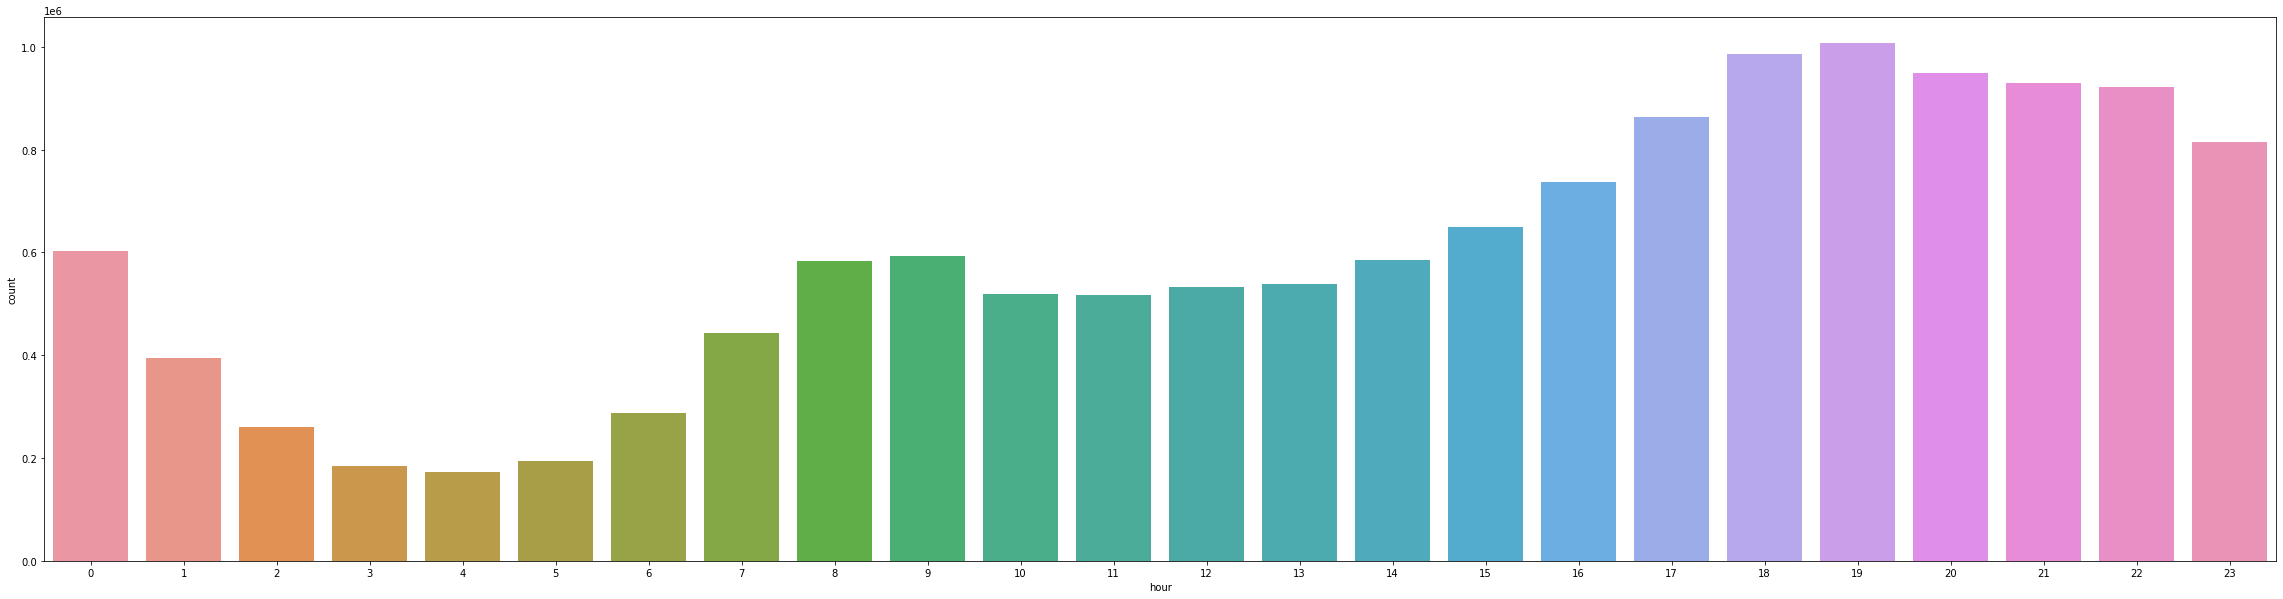

In [174]:
plt.figure(figsize=(40,10))
sns.countplot(uber_15['hour'])

In [175]:
uber_15.groupby(['weekday','hour'])['Pickup_date'].count()

weekday    hour
Friday     0        85939
           1        46616
           2        28102
           3        19518
           4        23575
                    ...  
Wednesday  19      143751
           20      136003
           21      133993
           22      127026
           23       99490
Name: Pickup_date, Length: 168, dtype: int64

In [176]:
# Let's transform it into dataset
summary=uber_15.groupby(['weekday','hour'])['Pickup_date'].count().reset_index()
summary

,weekday,hour,Pickup_date
0,Friday,0,85939
1,Friday,1,46616
2,Friday,2,28102
3,Friday,3,19518
4,Friday,4,23575
...,...,...,...
163,Wednesday,19,143751
164,Wednesday,20,136003
165,Wednesday,21,133993
166,Wednesday,22,127026


In [177]:
summary.columns=['weekday','hour','counts']

In [178]:
summary.head()

,weekday,hour,counts
0,Friday,0,85939
1,Friday,1,46616
2,Friday,2,28102
3,Friday,3,19518
4,Friday,4,23575


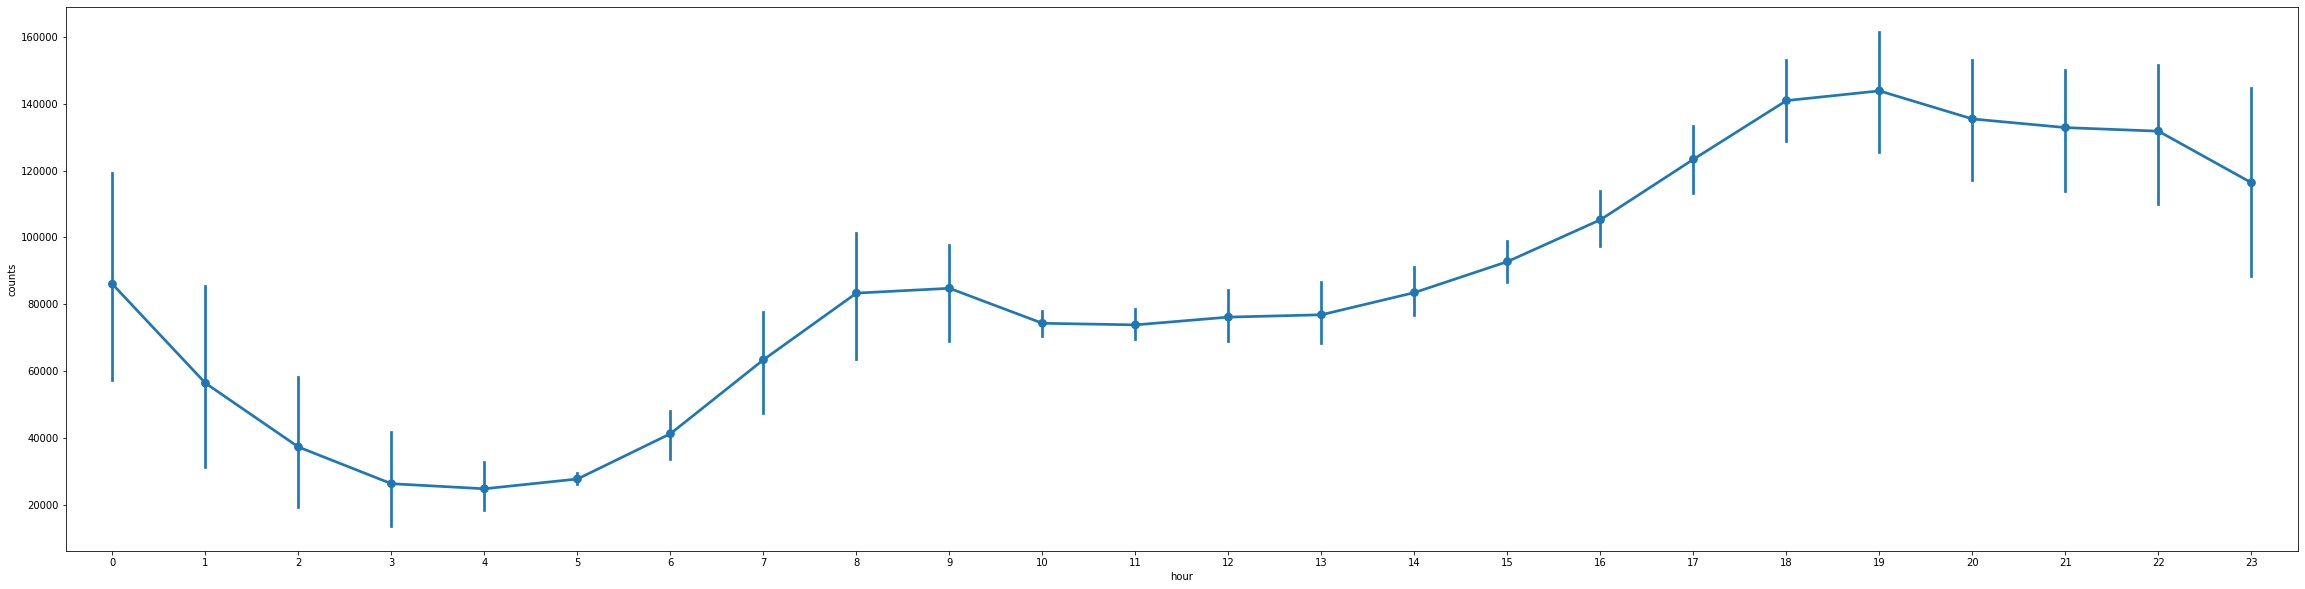

In [181]:
# Plot count by hour 
plt.figure(figsize=(40,10))
sns.pointplot(x='hour', y='counts', data=summary)

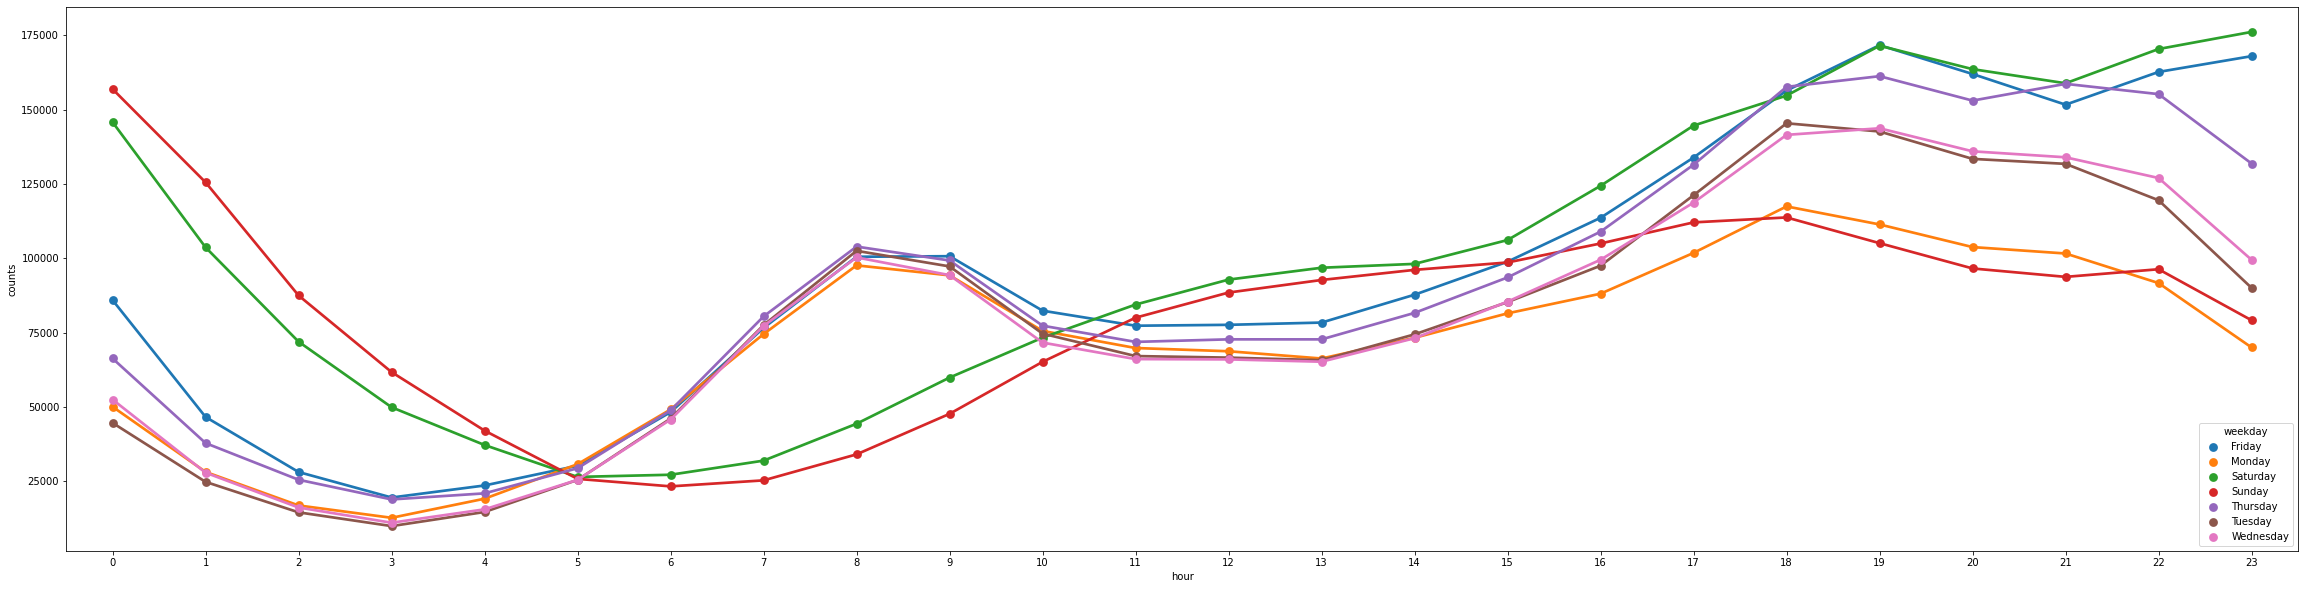

In [184]:
# Plot count by hour with weekday
plt.figure(figsize=(40,10))
sns.pointplot(x='hour', y='counts', hue='weekday', data=summary)

##### Perform in-Depth Analysis of Uber Base Number 

In [187]:
uber_foil=pd.read_csv(r'/content/drive/MyDrive/ml_data/Data_Analysis/Project_1 Uber New York Data analysis /uber-pickups-in-new-york-city/Uber-Jan-Feb-FOIL.csv')

In [188]:
uber_foil.head()

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537


In [189]:
# Q1; Analyzing which base number has most active vehicules...
# Q2 Analyzing which base number has most trips 
# Q3 How average trip/vehicle in/ decrease with dates each of base num

In [190]:
uber_foil.shape

(354, 4)

In [191]:
uber_foil.dtypes

dispatching_base_number    object
date                       object
active_vehicles             int64
trips                       int64
dtype: object

In [192]:
uber_foil['dispatching_base_number'].unique()

array(['B02512', 'B02765', 'B02764', 'B02682', 'B02617', 'B02598'],
      dtype=object)

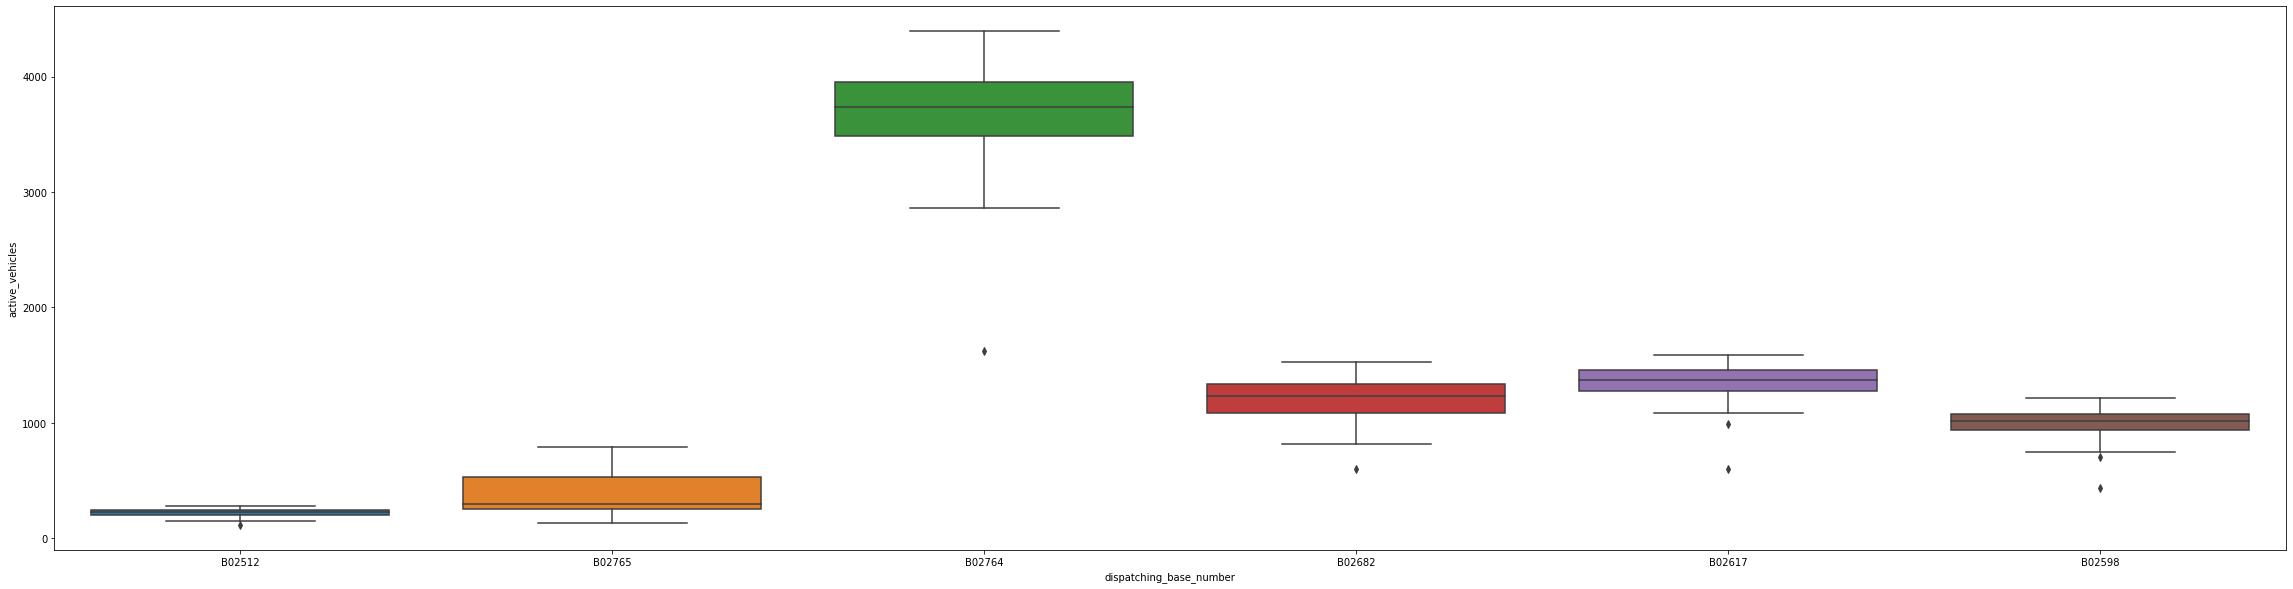

In [194]:
# Q1; Analyzing which base number has most active vehicules...
plt.figure(figsize=(40,10))
sns.boxplot(x='dispatching_base_number', y='active_vehicles', data=uber_foil)

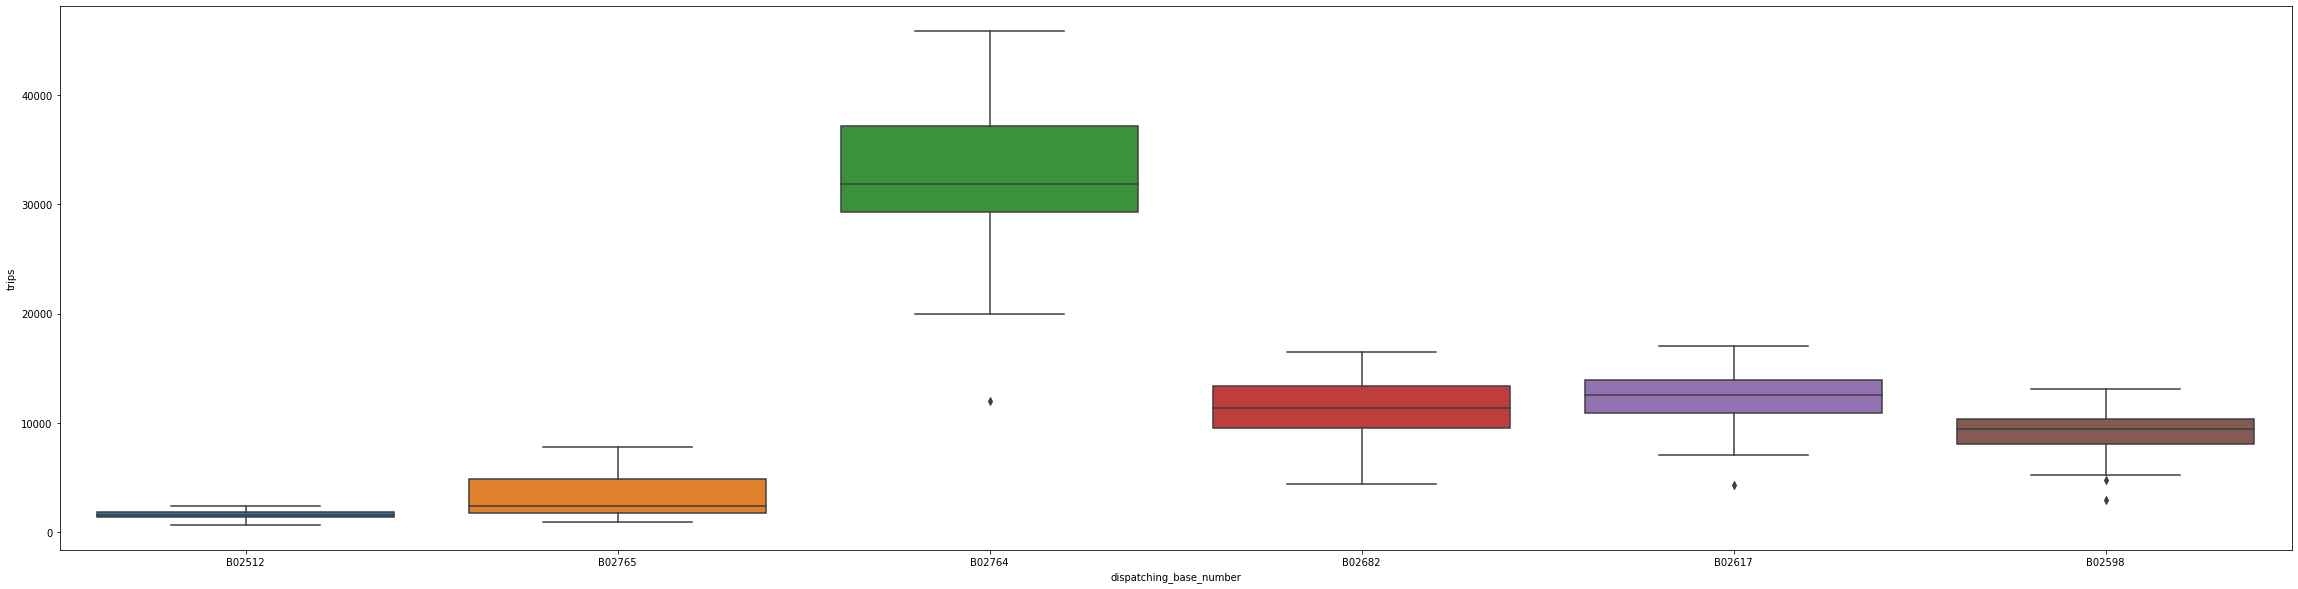

In [195]:
# Q2 Analyzing which base number has most trips 
plt.figure(figsize=(40,10))
sns.boxplot(x='dispatching_base_number', y='trips', data=uber_foil)

In [197]:
# Q3 How average trip/vehicle in/ decrease with dates each of base num
uber_foil['trips/vehicule']=uber_foil['trips']/uber_foil['active_vehicles']

In [198]:
uber_foil.head()

,dispatching_base_number,date,active_vehicles,trips,trips/vehicule
0,B02512,1/1/2015,190,1132,5.957895
1,B02765,1/1/2015,225,1765,7.844444
2,B02764,1/1/2015,3427,29421,8.585060
3,B02682,1/1/2015,945,7679,8.125926
4,B02617,1/1/2015,1228,9537,7.766287


In [199]:
# let's set date as index 
uber_foil.set_index('date')

,dispatching_base_number,active_vehicles,trips,trips/vehicule
date,,,,
1/1/2015,B02512,190,1132,5.957895
1/1/2015,B02765,225,1765,7.844444
1/1/2015,B02764,3427,29421,8.585060
1/1/2015,B02682,945,7679,8.125926
1/1/2015,B02617,1228,9537,7.766287
...,...,...,...,...
2/28/2015,B02764,3952,39812,10.073887
2/28/2015,B02617,1372,14022,10.220117
2/28/2015,B02682,1386,14472,10.441558


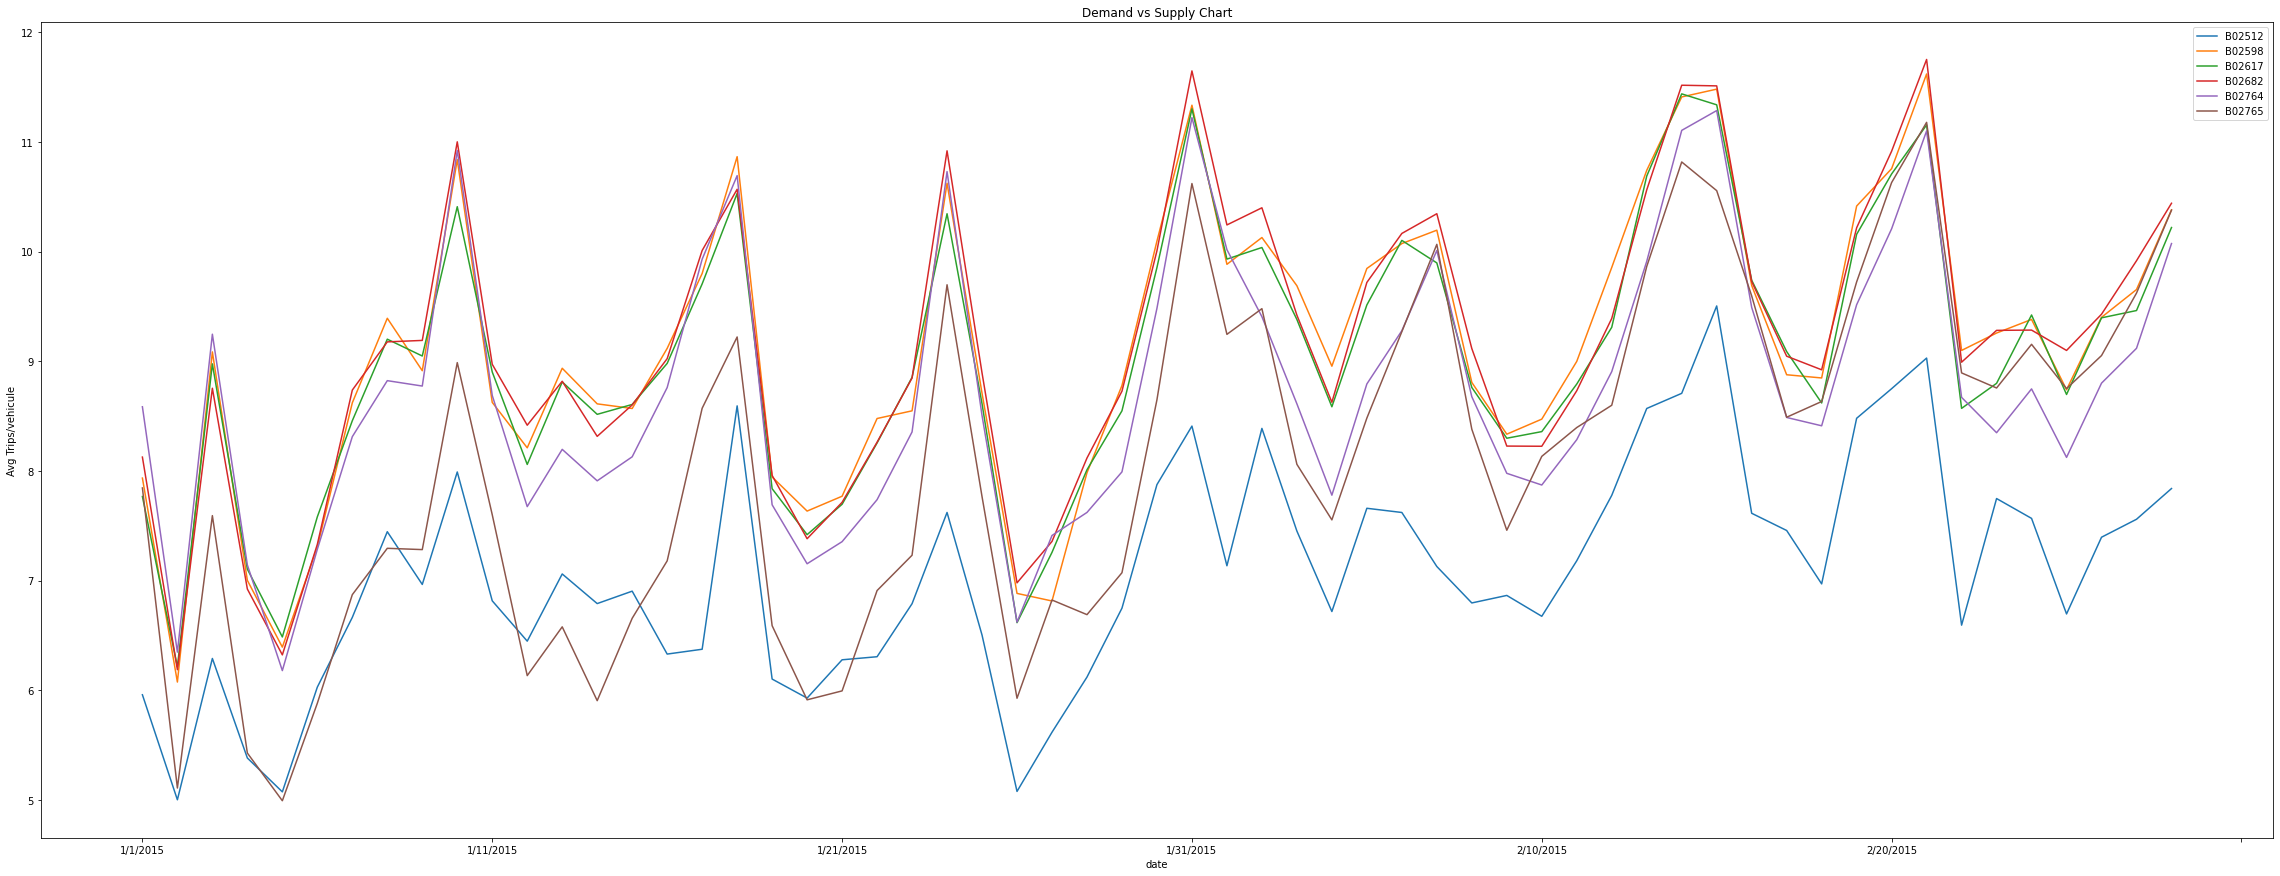

In [204]:
# Group your data on basis of disparching_base_number  
plt.figure(figsize=(40,15))
uber_foil.set_index('date').groupby(['dispatching_base_number'])['trips/vehicule'].plot()
plt.ylabel('Avg Trips/vehicule')
plt.title('Demand vs Supply Chart')
plt.legend()